Tensorflow Pretrained Models - https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [35]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

import cv2
import matplotlib.pyplot as plt

In [8]:
model = ResNet50(weights="imagenet")       # use the ResNet50 model trained on the ImageNet Competition

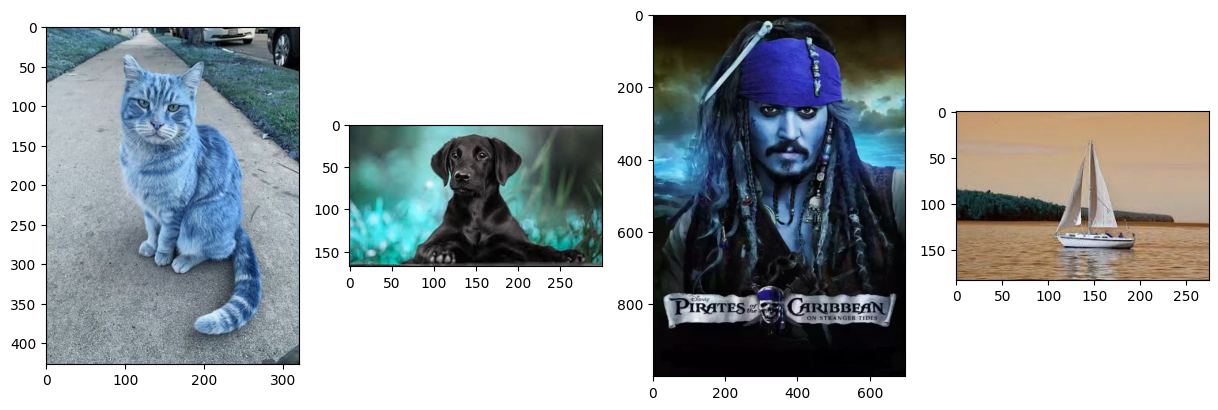

In [26]:
cat = cv2.imread("./cat.jpg")
dog = cv2.imread("./dog.jpg")
human = cv2.imread("./human.jpg")
boat = cv2.imread("./boat.jpg")

fig, ax = plt.subplots(ncols=4, figsize=(15,5))
ax[0].imshow(cat)
ax[1].imshow(dog)
ax[2].imshow(human)
ax[3].imshow(boat)

In [31]:
# Resizing the images

cat = cv2.resize(cat, (224, 224))       # Resnet50 requires 224x224 images
dog = cv2.resize(dog, (224, 224))      
human = cv2.resize(human, (224, 224))       
boat = cv2.resize(boat, (224, 224))    

# Reshaping into batches
cat = cat.reshape(1, 224, 224, 3)           # batch size 1
dog = dog.reshape(1, 224, 224, 3)
human = human.reshape(1, 224, 224, 3)
boat = boat.reshape(1, 224, 224, 3)

In [32]:
cat.shape

(1, 224, 224, 3)

In [ ]:
y_pred = model.predict(cat)

decode_predictions(y_pred, 3)       # get top 3 predictions and their confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


[[('n02123159', 'tiger_cat', np.float32(0.7179799)),
  ('n02123045', 'tabby', np.float32(0.21709037)),
  ('n02124075', 'Egyptian_cat', np.float32(0.033311512))]]

In [ ]:
decode_predictions(model.predict(dog), 3)     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


[[('n02092339', 'Weimaraner', np.float32(0.29520264)),
  ('n02099712', 'Labrador_retriever', np.float32(0.23789294)),
  ('n02089078', 'black-and-tan_coonhound', np.float32(0.23621234))]]

In [ ]:
decode_predictions(model.predict(human), 3)     # bruh it classified the cloth

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


[[('n02667093', 'abaya', np.float32(0.22658466)),
  ('n04584207', 'wig', np.float32(0.10974843)),
  ('n04356056', 'sunglasses', np.float32(0.1088275))]]

In [40]:
decode_predictions(model.predict(boat), 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


[[('n04612504', 'yawl', np.float32(0.5720102)),
  ('n02981792', 'catamaran', np.float32(0.15142387)),
  ('n04483307', 'trimaran', np.float32(0.117675014))]]

In [ ]:
# How the fuck does it get so accurate with 1000 classes and even getting specific breed and type of boat